# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})


Dibuja un diagrama de dispersión (scatter plot) para los datos.

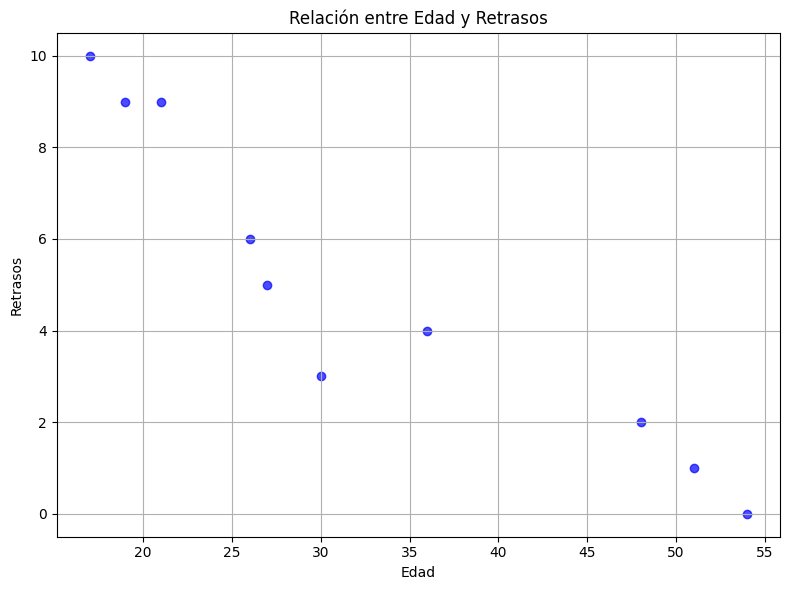

In [4]:
# Extraer los datos de edad y retrasos
edades = student_data['Edad']
retrasos = student_data['Retrasos']

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(edades, retrasos, color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.title('Relación entre Edad y Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

# Mostrar el scatter plot
plt.grid(True)
plt.tight_layout()
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Parece haber una ligera tendencia negativa entre la edad y el número de retrasos. Esto significa que, en general, los estudiantes más jóvenes tienden a tener más retrasos que los estudiantes más mayores en este conjunto de datos.


Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [5]:
# Calcular la covarianza entre Edad y Retrasos
covariance = student_data['Edad'].cov(student_data['Retrasos'])

# Calcular la correlación entre Edad y Retrasos
correlation = student_data['Edad'].corr(student_data['Retrasos'])

# Mostrar resultados
print(f'Covarianza entre Edad y Retrasos: {covariance:.2f}')
print(f'Correlación entre Edad y Retrasos: {correlation:.2f}')

Covarianza entre Edad y Retrasos: -45.57
Correlación entre Edad y Retrasos: -0.94


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [7]:
X = student_data[['Edad']]  # Variables predictoras (independientes)
y = student_data['Retrasos']  # Variable de resultado (dependiente)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Coeficientes del modelo
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Imprimir los coeficientes del modelo
print(f'Intercepto (beta_0): {beta_0:.4f}')
print(f'Coeficiente de Edad (beta_1): {beta_1:.4f}')

# Predecir los valores de Retrasos basados en Edad
y_pred = model.predict(X)


Intercepto (beta_0): 12.8888
Coeficiente de Edad (beta_1): -0.2428


Grafica tu modelo de regresión en tu diagrama de dispersión.

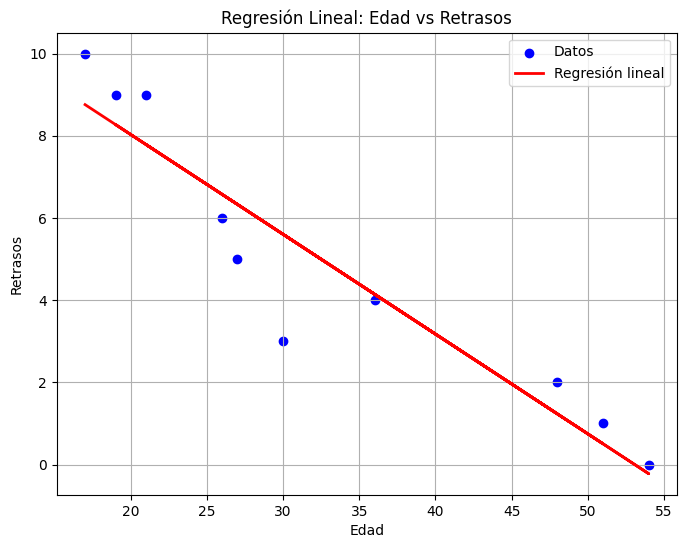

In [8]:

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal: Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Intercepto (beta_0): El valor del intercepto es 12.8888. Este valor representa el número esperado de retrasos cuando la edad es cero. Sin embargo, en el contexto de edad de los estudiantes, este valor puede no tener un significado práctico directo, ya que no podemos tener edades negativas.

Coeficiente de Edad (beta_1): El coeficiente de edad es -0.2428. Este coeficiente indica que, en promedio, por cada año adicional de edad de los estudiantes, se espera que el número de retrasos disminuya en aproximadamente 0.2428 unidades. Es decir, los estudiantes más jóvenes tienden a tener más retrasos en comparación con los estudiantes más mayores, según los datos de tu muestra.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [13]:


# Seleccionar las columnas de interés
columns_of_interest = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_subset = vehicles[columns_of_interest]

# Calcular las correlaciones
correlations = vehicles_subset.corr()

print(correlations)


                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [14]:
import statsmodels.api as sm
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']


X = sm.add_constant(X)


model = sm.OLS(y, X)



results = model.fit()

# Imprimir un resumen del modelo
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                             21:33:51   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Comentarios sobre los resultados del modelo de regresión lineal múltiple:
# R-squared y Adj. R-squared:

# El coeficiente de determinación (R-squared) es 0.981, lo que indica que aproximadamente el 98.1% de la variabilidad en las emisiones de CO2 se explica por las variables predictoras incluidas en el modelo.
# El R-squared ajustado (Adj. R-squared) es igual a 0.981, lo que sugiere que el modelo no pierde capacidad predictiva al incluir más variables.
# F-statistic y Prob (F-statistic):

# El valor del estadístico F es extremadamente alto (3.687e+05), lo que indica que el modelo en su conjunto es altamente significativo.
# El valor de probabilidad asociado (Prob (F-statistic)) es prácticamente cero (0.00), lo que sugiere que al menos una de las variables predictoras es significativamente diferente de cero en relación con las emisiones de CO2.
# Coeficientes de Regresión:

# Todos los coeficientes de las variables predictoras (Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year) son estadísticamente significativos (P < 0.05).
# Interpretación de los coeficientes:
# Year: Tiene un coeficiente negativo, lo que sugiere que las emisiones de CO2 tienden a disminuir a medida que el año del vehículo aumenta.
# Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year: Todos tienen coeficientes positivos, indicando que un mayor número de cilindros, más barriles de combustible por año, menor MPG combinado y mayor costo de combustible están asociados con mayores emisiones de CO2.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Crear el DataFrame con los datos proporcionados
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)



Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

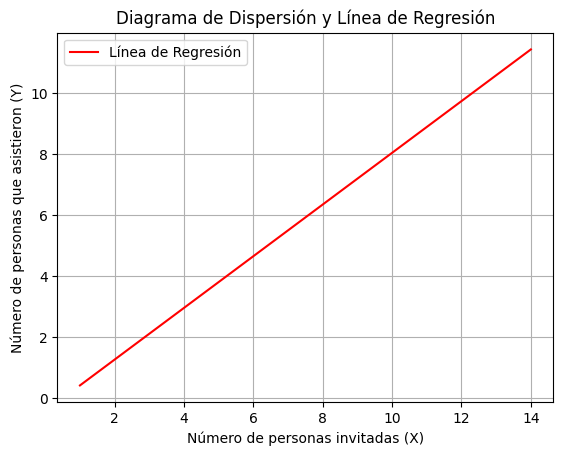

Coeficiente de correlación entre X y Y: 0.97
P-valor: 0.0001
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           0.000102
Time:                        21:43:42   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [21]:
X = sm.add_constant(X)  # Agregar una constante para el término independiente
model = sm.OLS(Y, X).fit()  # Ajustar el modelo de regresión lineal
plt.plot(df['X'], model.predict(), color='red', label='Línea de Regresión')

# Personalización del gráfico
plt.title('Diagrama de Dispersión y Línea de Regresión')
plt.xlabel('Número de personas invitadas (X)')
plt.ylabel('Número de personas que asistieron (Y)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Correlación
correlation = pearsonr(df['X'], df['Y'])
print(f"Coeficiente de correlación entre X y Y: {correlation[0]:.2f}")
print(f"P-valor: {correlation[1]:.4f}")

# 3. Regresión Lineal
X = df['X']
Y = df['Y']
X = sm.add_constant(X)  # Agregar una constante para el término independiente

model = sm.OLS(Y, X).fit()  # Ajustar el modelo de regresión lineal
print(model.summary())


¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

nálisis inicial muestra que hay una fuerte correlación positiva entre el número de personas invitadas (X) y el número de personas que asistieron (Y), con un coeficiente de correlación de 0.97 y un p-valor muy bajo (0.0001), lo que indica una relación significativa entre estas variables.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [19]:
# Eliminar el punto problemático
df_cleaned = df[df['X'] != 14]

# Ajustar el modelo de regresión lineal con los datos limpios
X_cleaned = df_cleaned['X']
Y_cleaned = df_cleaned['Y']
X_cleaned = sm.add_constant(X_cleaned)  # Agregar una constante para el término independiente
model_cleaned = sm.OLS(Y_cleaned, X_cleaned).fit()

# Mostrar los resultados del nuevo modelo
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           0.000264
Time:                        21:42:59   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


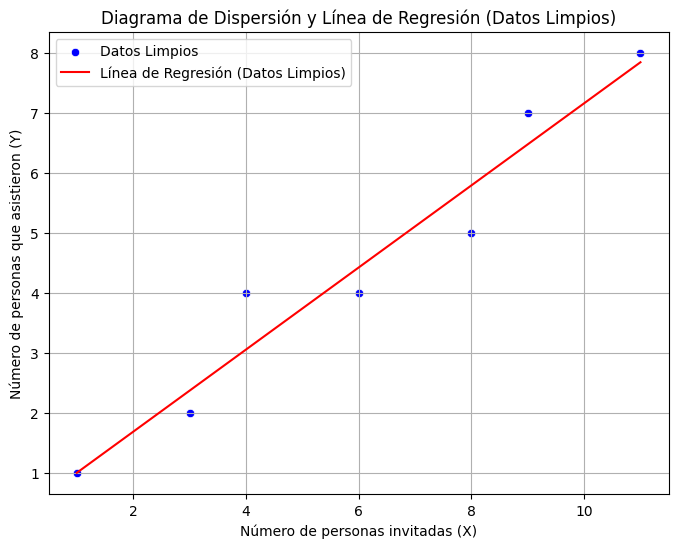

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           0.000264
Time:                        21:43:32   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [20]:
# Diagrama de Dispersión y Regresión Lineal con datos limpios
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', data=df_cleaned, color='blue', label='Datos Limpios')

# Ajustar la línea de regresión con datos limpios
plt.plot(df_cleaned['X'], model_cleaned.predict(), color='red', label='Línea de Regresión (Datos Limpios)')

# Personalización del gráfico
plt.title('Diagrama de Dispersión y Línea de Regresión (Datos Limpios)')
plt.xlabel('Número de personas invitadas (X)')
plt.ylabel('Número de personas que asistieron (Y)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los resultados del nuevo modelo
print(model_cleaned.summary())

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*